In [1]:
import pandas as pd

data = pd.read_csv("all_data.csv")

In [2]:
selected_features = [
    'ifOutUcastPkts11', 'ifOutNUcastPkts11', 'tcpInSegs', 'tcpRetransSegs',
    'tcpEstabResets', 'udpOutDatagrams', 'udpInErrors', 'udpNoPorts',
    'ipOutDiscards', 'ipInDiscards', 'ipInAddrErrors', 'icmpInDestUnreachs',
    'icmpOutDestUnreachs', 'class'
]

data_filtered = data[selected_features]

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data_filtered.drop(columns=["class"])
y = data_filtered["class"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')

In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:42] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:43] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:44] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:45] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:46] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:47] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:48] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:49] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:50] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:51] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]



--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 2050, in update
    _check_call(
  File "/home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/core.py", line 282, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [08:10:52] /workspace/src/metric/metric.cc:49: Unknown metric function accuracy
Stack trace:
  [bt] (0) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7eb6b35ba24e]
  [bt] (1) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7eb6b38f7e7e]
  [bt] (2) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7eb6b38ccdd3]
  [bt] (3) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7eb6b38c5268]
  [bt] (4) /home/bordeauxsyrup/.local/lib/python3.12/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7eb6b3561ef0]
  [bt] (5) /usr/lib/libffi.so.8(+0x7596) [0x7eb708e53596]
  [bt] (6) /usr/lib/libffi.so.8(+0x400e) [0x7eb708e5000e]
  [bt] (7) /usr/lib/libffi.so.8(ffi_call+0x123) [0x7eb708e52bd3]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x6be4) [0x7eb708e5dbe4]




In [ ]:
best_xgb = grid_search.best_estimator_

In [ ]:
y_pred = best_xgb.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.99      1.00      0.99        98
           2       0.99      1.00      1.00       130
           3       1.00      1.00      1.00       134
           4       1.00      0.99      1.00       160
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00       190
           7       1.00      0.99      1.00       152

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 99.80%


In [ ]:
from joblib import dump

dump(best_xgb, 'xgb_se.joblib')
dump(scaler, 'scaler_xgb_se.joblib')
dump(label_encoder, 'label_encoder_xgb_se.joblib')

['pca_model.joblib']

In [ ]:
import numpy as np

scaler_params = {'mean': scaler.mean_, 'scale': scaler.scale_}
np.save('xgb_scaler_params_se.npy', scaler_params)

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Perform cross-validation
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_xgb, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

KeyboardInterrupt: 

In [ ]:
# import shap

# # X_train_summary = shap.sample(X_train_scaled, 100)
# explainer = shap.KernelExplainer(best_xgb.predict_proba, X_train_scaled)
# shap_values = explainer.shap_values(X_test_scaled, nsamples=1000)

In [ ]:
# shap.summary_plot(shap_values, X_test_scaled, max_display=X_test_scaled.shape[1], plot_type="bar")

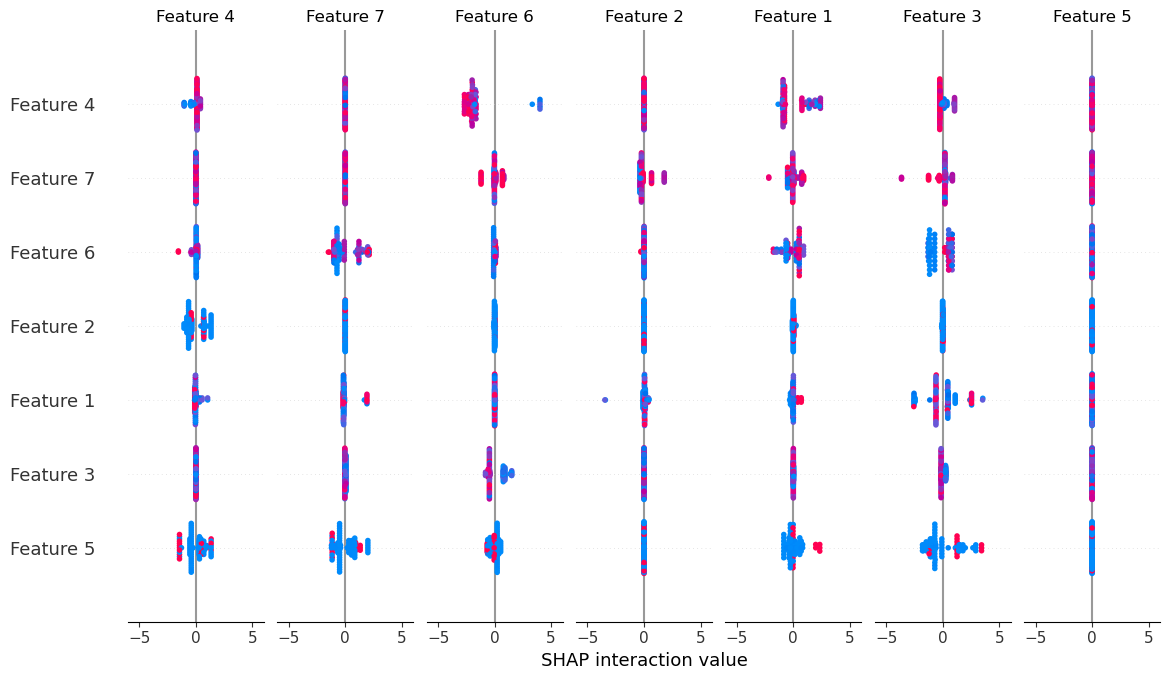

In [ ]:
import shap

# Define selected columns for SHAP summary plot
# selected_columns = [
#     'ifOutUcastPkts11', 'ifOutNUcastPkts11', 'tcpInSegs', 'tcpRetransSegs',
#     'tcpEstabResets', 'udpOutDatagrams', 'udpInErrors', 'udpNoPorts',
#     'ipOutDiscards', 'ipInDiscards', 'ipInAddrErrors', 'icmpInDestUnreachs',
#     'icmpOutDestUnreachs'
# ]

# Sample from reduced feature set for SHAP analysis
X_train_summary = shap.sample(X_train_scaled, 100)
# X_train_summary = X_train_summary[:, :len(selected_columns)]  # Ensure correct length
# df_X_train_summary = pd.DataFrame(X_train_summary)

# Explain with SHAP
explain = shap.Explainer(best_xgb, X_train_summary)
shap_val = explain(X_train_summary)

# Plot SHAP summary plot
shap.summary_plot(shap_val, X_train_summary)

In [ ]:
print(shap_val.shape)

(100, 34, 8)


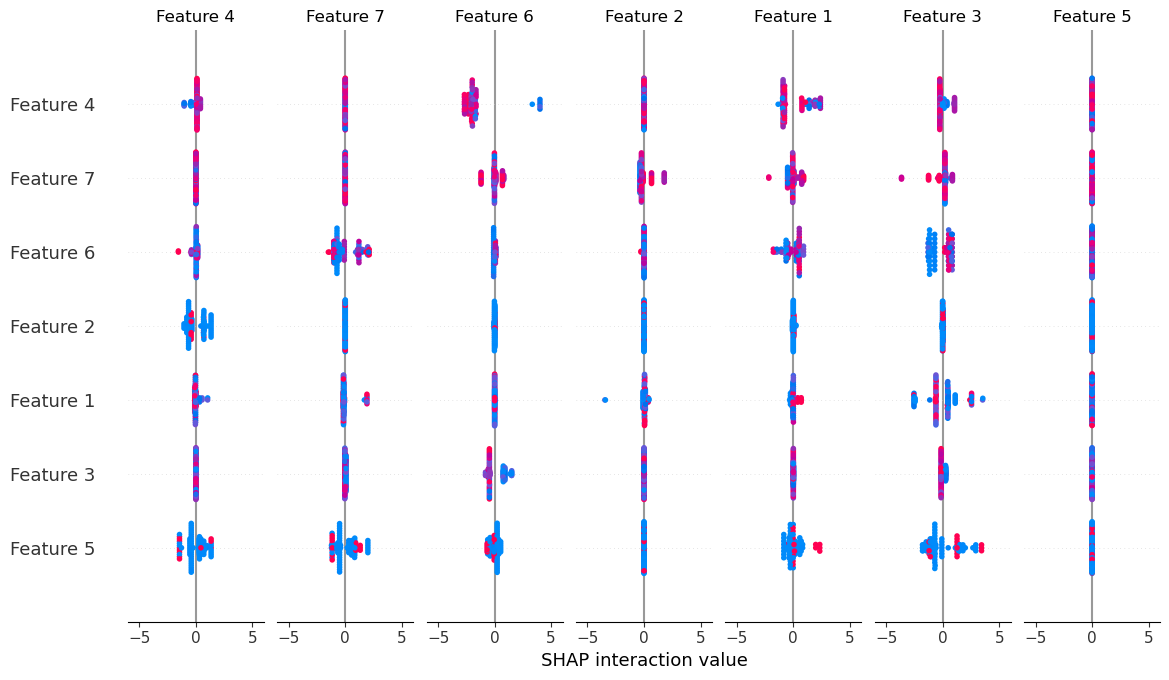

In [ ]:
exp = shap.Explainer(best_xgb, X_train_summary)
sv = exp.shap_values(X_train_summary)

shap.summary_plot(sv, X_train_summary)